#### keras practice

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'2.4.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
# import fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = "a b c d e f g h j k".split()
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [10]:
# build model

# input layer
model = keras.Sequential()

# hidden layer Flatten
model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.InputLayer(input_shape=[28,28])) # the same

# hidden layer Dense 1
model.add(keras.layers.Dense(500, activation="relu"))

# hidden layer Dense 2
model.add(keras.layers.Dense(200, activation="relu"))

# output layer Dense 3
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
# model info
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [14]:
h = model.get_layer("dense_2")

In [15]:
weights, biases = h.get_weights()
weights.shape

(200, 10)

In [16]:
biases.shape

(10,)

In [17]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, batch_size=55, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1000/1000 [==============================] - 12s 11ms/step - loss: 1.0826 - accuracy: 0.6792 - val_loss: 0.5460 - val_accuracy: 0.8228
Epoch 2/30
1000/1000 [==============================] - 11s 11ms/step - loss: 0.5426 - accuracy: 0.8158 - val_loss: 0.4724 - val_accuracy: 0.8416
Epoch 3/30
1000/1000 [==============================] - 10s 10ms/step - loss: 0.4732 - accuracy: 0.8378 - val_loss: 0.4477 - val_accuracy: 0.8528
Epoch 4/30
1000/1000 [==============================] - 10s 10ms/step - loss: 0.4446 - accuracy: 0.8452 - val_loss: 0.4206 - val_accuracy: 0.8568
Epoch 5/30
1000/1000 [==============================] - 11s 11ms/step - loss: 0.4307 - accuracy: 0.8499 - val_loss: 0.4251 - val_accuracy: 0.8566
Epoch 6/30
1000/1000 [==============================] - 10s 10ms/step - loss: 0.4087 - accuracy: 0.8572 - val_loss: 0.4005 - val_accuracy: 0.8600
Epoch 7/30
1000/1000 [==============================] - 10s 10ms/step - loss: 0.3924 - accuracy: 0.8622 - val_loss: 0.3879 -

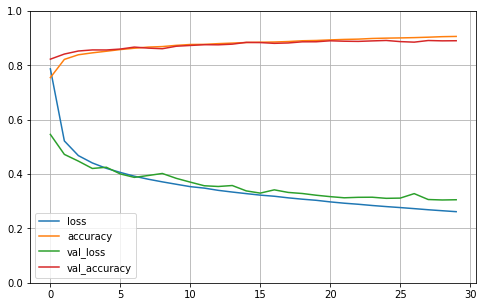

In [19]:
# result visualization
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 68.3753 - accuracy: 0.8435


[68.37527465820312, 0.843500018119812]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = np.argmax( model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

#### Implement for regression

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [24]:
X_train_full,  X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [25]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [26]:
# data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)
X_train.shape

(11610, 8)

In [27]:
model = keras.models.Sequential([keras.layers.Dense(10, activation="relu", input_shape=X_train.shape[1:]), 
                                 keras.layers.Dense(1) ])

In [28]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [29]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.6703 - val_loss: 0.5032
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5072 - val_loss: 0.6122
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4583 - val_loss: 0.6571
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5114 - val_loss: 1.2308
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 1.1724 - val_loss: 3.2200
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4200 - val_loss: 3.2987- ETA: 0s - loss: 0.4
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4226 - val_loss: 3.1448
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4237 - val_loss: 3.2556
Epoch 9/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3982 - val_loss: 3.3310
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.36

In [30]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4216


0.42155081033706665

#### Functional interface

In [31]:
input_ = keras.layers.Input(shape= X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [36]:
model.compile(loss = "categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [38]:
model.save("keras_model")

model = keras.models.load_model("keras_model")

INFO:tensorflow:Assets written to: keras_model\assets


#### Callbacks & early stopping

In [39]:
model.layers

In [40]:
history = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
46/46 [==============================] - 2s 17ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
Epoch 2/20
46/46 [==============================] - 0s 9ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
Epoch 3/20
46/46 [==============================] - 0s 11ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
Epoch 4/20
46/46 [==============================] - 0s 8ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
Epoch 5/20
46/46 [==============================] - 0s 7ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
Epoch 6/20
46/46 [==============================] - 0s 11ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
Epoch 7/20
46/46 [==============================] - 0s 9ms/step - loss: 2.4766e-07 - 

In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model")

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 6ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflo

In [44]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tensorflow:Assets written to: keras_model\assets
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 2.4766e-07 - accuracy: 0.0012 - val_loss: 2.4240e-07 - val_accuracy: 2.5840e-04
INFO:tens